1. The "Messy Retail Audit"

Scenario: You receive a raw CSV dump from a legacy retail system. Columns have mixed types, 'null' text strings, and formatting errors.

Tasks:

Identify and unify 4 different types of missing value markers (e.g., n/a, -, ?, NaN).

Convert Date columns from object to datetime (handling mixed formats like DD-MM-YYYY and MM/DD/YYYY).

Clean the Price column (remove currency symbols $, € and convert to float).

Deduplicate rows based on TransactionID but keep the most recent entry.

Dataset: Sample Superstore Dataset (Note: You may need to manually introduce errors like NaN or bad formatting to practice cleaning, or use the "Dirty Data" practice sets on Kaggle).

Alternative: I can generate a Python script to create a "dirty" CSV for you if you choose this task.

In [1]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("bravehart101/sample-supermarket-dataset")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.


d:\testing\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Biswajit\.cache\kagglehub\datasets\bravehart101\sample-supermarket-dataset\versions\1


In [2]:
src="./datasets/bravehart101/sample-supermarket-dataset/versions/1"

In [3]:
import pandas as pd
df = pd.read_csv(src+"/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.size

129922

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
print("Ship Mode:", df["Ship Mode"].value_counts(),end="\n\n")
print("Segment:", df["Segment"].value_counts(),end="\n\n")
print("Country:", df["Country"].value_counts())

Ship Mode: Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Segment: Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Country: Country
United States    9994
Name: count, dtype: int64


In [10]:
print("City:", df["City"].value_counts())

City: City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Abilene            1
Montebello         1
Kissimmee          1
Danbury            1
Springdale         1
Name: count, Length: 531, dtype: int64


In [11]:
print("State:", df["State"].value_counts())

State: State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
N

In [12]:
print("Region:", df["Region"].value_counts(),end="\n\n")
print("Category:", df["Category"].value_counts())

Region: Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Category: Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [13]:
print("Sub-Category:", df["Sub-Category"].value_counts())

Sub-Category: Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


In [14]:
print("City:", df["City"].nunique())

City: 531


In [15]:
df.duplicated().value_counts()

False    9977
True       17
Name: count, dtype: int64

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    9977
Name: count, dtype: int64

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


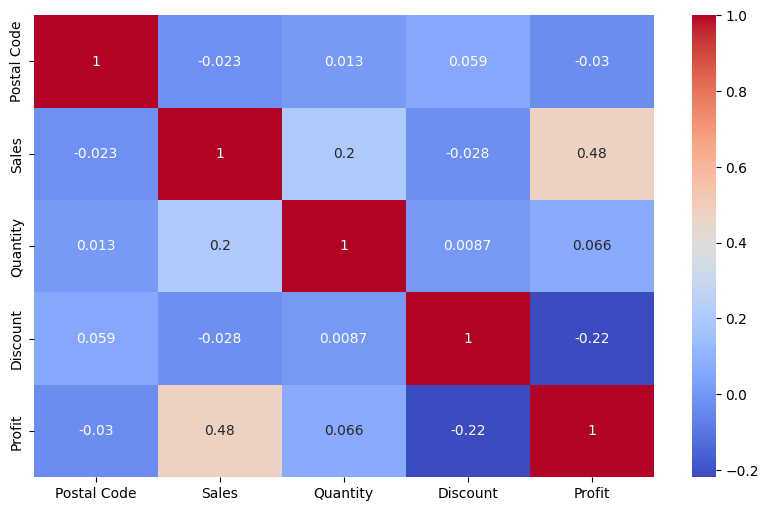

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


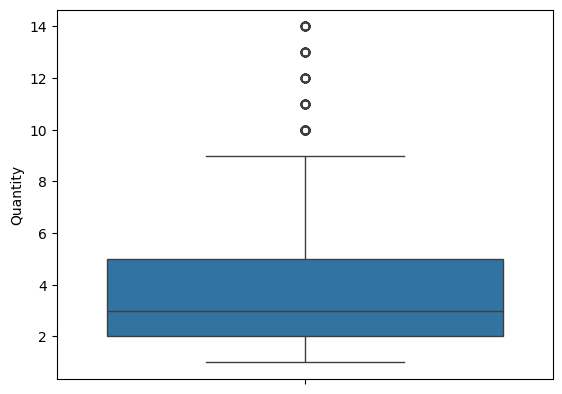

In [19]:
sns.boxplot(df['Quantity'])
plt.show()

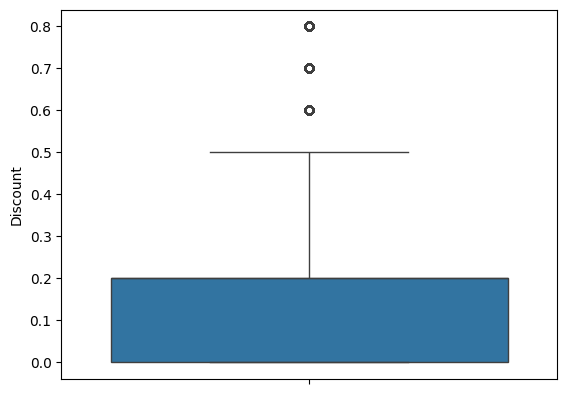

In [20]:
sns.boxplot(df['Discount'])
plt.show()

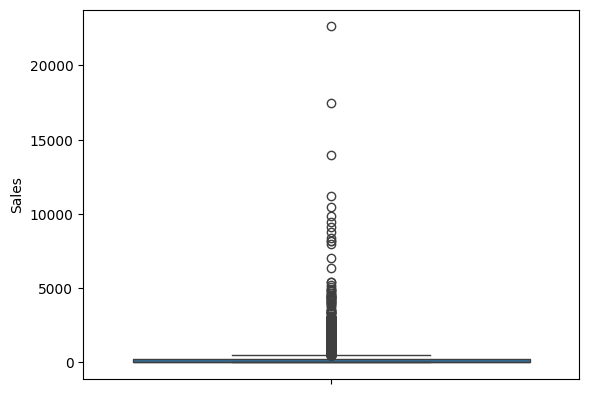

In [21]:
sns.boxplot(df['Sales'])
plt.show()

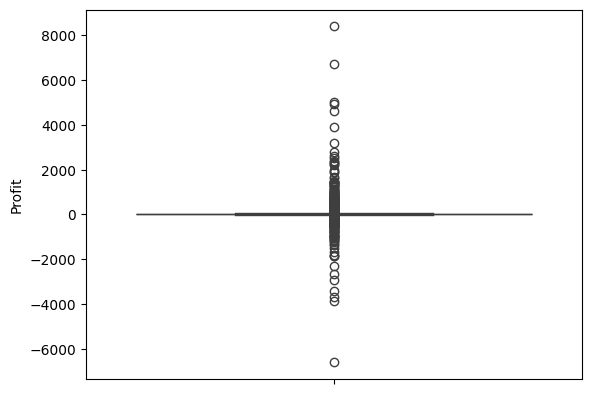

In [22]:
sns.boxplot(df['Profit'])
plt.show()

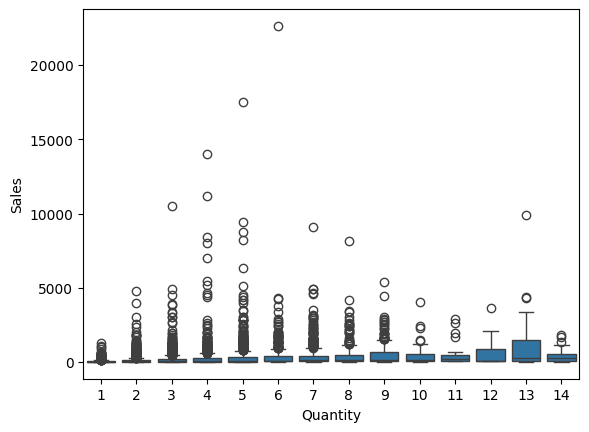

In [23]:
sns.boxplot(x='Quantity', y='Sales', data=df)
plt.show()

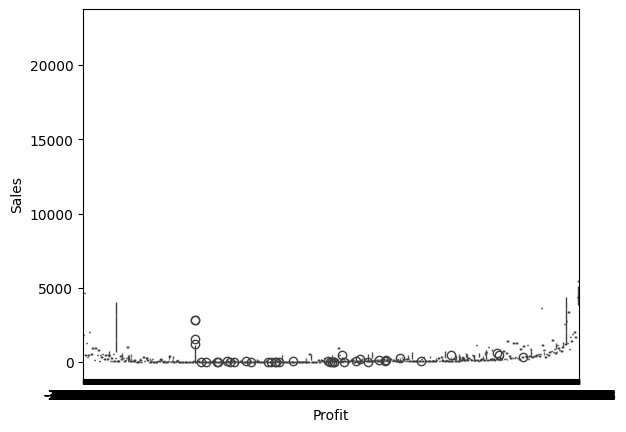

In [24]:
sns.boxplot(x='Profit', y='Sales', data=df)
plt.show()

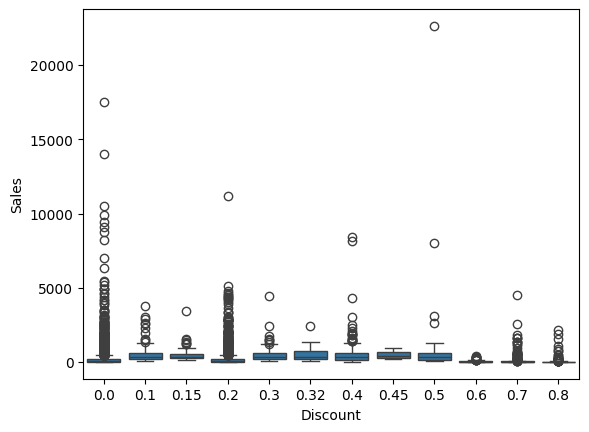

In [25]:
sns.boxplot(x='Discount', y='Sales', data=df)
plt.show()

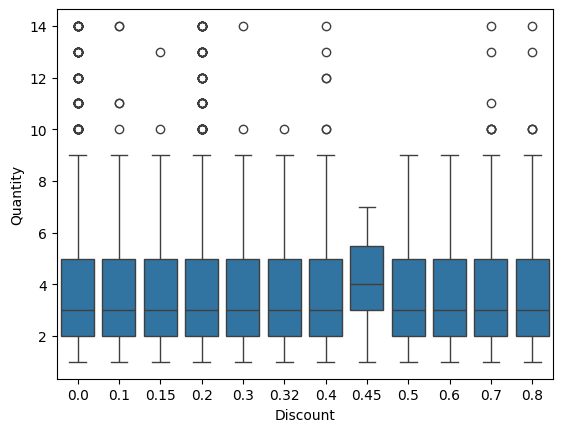

In [26]:
sns.boxplot(x='Discount', y='Quantity', data=df)
plt.show()


--- Financial Audit ---
Total Sales:  $2,296,195.59
Total Profit: $286,241.42
Profit Margin: 12.47%


C:\Users\Biswajit\AppData\Local\Temp\ipykernel_13540\3987155893.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Sales', palette='viridis')


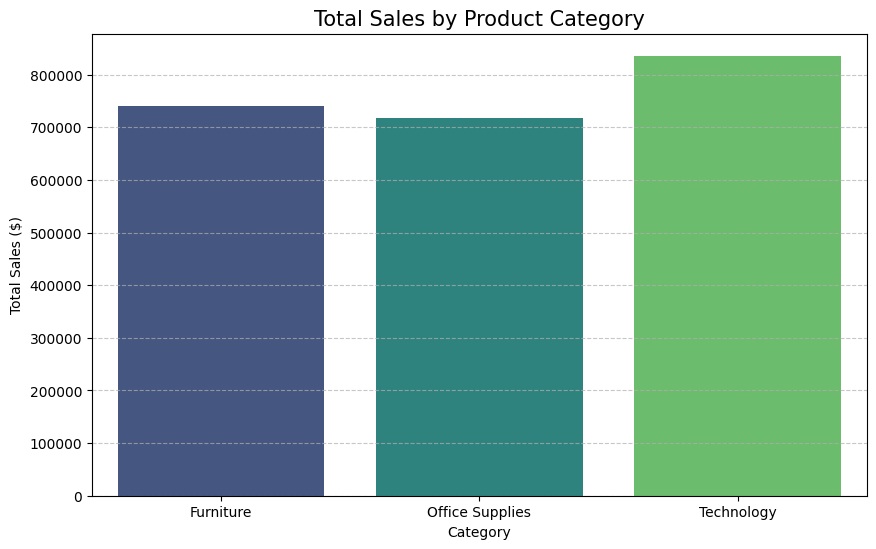

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 3: Analysis ---

print("\n--- Financial Audit ---")
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales:  ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")

# --- STEP 4: Visualization (The Report) ---

plt.figure(figsize=(10, 6))

# We group by Category and sum the Sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Plotting using Seaborn
sns.barplot(data=category_sales, x='Category', y='Sales', palette='viridis')

plt.title('Total Sales by Product Category', fontsize=15)
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
# Format y-axis to show dollar amounts (e.g., 100000 -> 100K is automatic in some, but let's keep it simple)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()